# **Tarea Módulo 03 - Diplomado de Data Science**

*   Autor: Amilcar Rodriguez
*   Fecha: 16/07/2023

 # Caso de estudio
He decidido analizar la base de datos de inversión historica del Ministerio de Obras Públicas (MOP) entre los años 2010 y 2022 obtenida desde Datos.gob.cl con el proposito de realizar una serie de ánalisis relacionados a la inversión presupuestaria por obras, periodos, regiones, entre otros.

La inquietud principal seria: ¿Como ha sido la administración historica de recursos del MOP en los últimos años?

Entre las preguntas que planteo para ayudarme a responder el objetivo pricipál, se encuentran:

1. ¿Regiones con mayor y menor inversión pública?
2. ¿Programas donde más se invierte?
3. ¿Periodos de mayor y menor inversión?
4. ¿Cual es la distribución de inversión por Comunas?

Base de Datos Ministerio de Obras Públicas: https://datos.gob.cl/dataset/104d1ebf-4d1b-4c3d-af9e-e85e5bbf1fc9/resource/910794a4-7f04-4b65-ac6b-68df9609d889/download/detalle_inversion_historica_mop_2010-2022.xls

In [ ]:
#Preparando librerias necesarias
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Para conectar Google Drive a nuestro notebook
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Leer archivo a Excel con el registro de dados 10-22
path="/content/drive/MyDrive/Colab Notebooks/Proyecto de Título - Amilcar/Datos/.xlsx"
#path2="" #Cambiar Path
df = pd.read_excel(path)
#Mostran una fila de datos para constatar estructura
df.head(1)

,AÑO,SERVICIO,SUBTITULO,ITEM,REGIÓN,BIP,ASIG,NOMBRE,INVERSIÓN (MILES DE $ DE CADA AÑO),INVERSIÓN (MILES DE $ AÑO 2022),SERVICIO2,TRANSANTIAGO,PROGRAMA,PROVINCIA,COMUNA
0,2010,Dirección de Arquitectura,31,2,Arica y Parinacota,30088379-0,2,AMPLIACION OFICINAS MOP EDIFICIO SERVICIOS PUB...,7700.0,12214.127069,Dirección de Arquitectura,N,EDIFICIOS MOP,ARICA,ARICA


Inspeccionando los datos...

In [ ]:
#Inspeccionar datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   AÑO                                 30179 non-null  int64  
 1   SERVICIO                            30179 non-null  object 
 2   SUBTITULO                           30179 non-null  int64  
 3   ITEM                                30179 non-null  int64  
 4   REGIÓN                              30179 non-null  object 
 5   BIP                                 30179 non-null  object 
 6   ASIG                                30179 non-null  int64  
 7   NOMBRE                              30179 non-null  object 
 8   INVERSIÓN (MILES DE $ DE CADA AÑO)  30179 non-null  float64
 9   INVERSIÓN (MILES DE $ AÑO 2022)     30179 non-null  float64
 10  SERVICIO2                           30179 non-null  object 
 11  TRANSANTIAGO                        30179

Las descripciones y sus análisis asociados se harán en base un conjunto de 30.179 registros acumulados entre los años 2010 y 2022, existen 15 series donde podemos acceder a contenido por comuna, región, programa, nombre proyecto, etc...

In [ ]:
df_describe_año = df['INVERSIÓN (MILES DE $ DE CADA AÑO)'].describe()
df_describe_año

count    3.017900e+04
mean     6.930546e+05
std      2.289238e+06
min      5.000000e-02
25%      5.763186e+03
50%      8.475444e+04
75%      3.824184e+05
max      7.231014e+07
Name: INVERSIÓN (MILES DE $ DE CADA AÑO), dtype: float64

De lo anterior, podemos ver que:

* El mayor monto de inversión realizado como registro individual y no como proyecto o programa es de: $7.231014e+07

*   El menor monto de inversión realizado como registro individual y no como proyecto o programa es de: $5.000000e-02

*   El promedio de inversión por registro es de: $6.930546e+05

In [ ]:
#Comparando al año 2022
df_describe_2022 = df['INVERSIÓN (MILES DE $ AÑO 2022)'].describe()
df_describe_2022

count    3.017900e+04
mean     8.852362e+05
std      2.896545e+06
min      5.582193e-02
25%      7.339046e+03
50%      1.083661e+05
75%      4.872364e+05
max      7.667966e+07
Name: INVERSIÓN (MILES DE $ AÑO 2022), dtype: float64

**1. ¿Regiones con mayor y menor inversión pública?**

In [ ]:
#Agrupando por regiones y total de inversión/cada una
df_regionesInversion = df.groupby('REGIÓN').agg(['sum'])['INVERSIÓN (MILES DE $ DE CADA AÑO)'].sort_values(by='sum', ascending=False)
df_regionesInversion

,sum
REGIÓN,
Metropolitana,2.359556e+09
Los Lagos,2.115088e+09
No Regionalizable,2.036002e+09
Bio Bio,1.864259e+09
Valparaíso,1.633447e+09
Araucanía,1.345159e+09
Coquimbo,1.285340e+09
Maule,1.235852e+09
Los Ríos,1.133126e+09


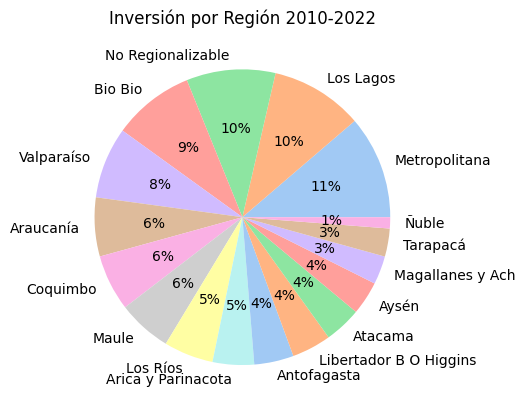

In [ ]:
#Graficando el resultado anterior
#Llevando las series de interes a listas
listValorPorRegion = df_regionesInversion["sum"].values.tolist()
listRegiones = df_regionesInversion.index.tolist()
#Graficando...
#Data
data = listValorPorRegion
#Etiquetas
labels = listRegiones
#Configuraciones varias
colors = sns.color_palette('pastel')
plt.pie(data, labels=labels, colors = colors, autopct = '%0.0f%%')
#Título del gráfico
plt.title('Inversión por Región 2010-2022')
#Mostrar gráfico
plt.show()

Las regiones con mayor inversión en el periodo 2010-2022 son La Región Metropolitana y la región de los Lagos. Por ota parte las regiones de tarapacá y Ñuble son las que tienen menor inversión. Por otra parte, La región metropolitana concentra el 11% del presupuesto total invertido en los últimos 12 años, mientras que la región de Ñuble un poco más de 1%.

**2. ¿Programas donde más se invierte?**

In [ ]:
#Agrupando por programas y su valor de inversión respectivo año por año
df_programasInversion = df.groupby('PROGRAMA').agg(['sum'])['INVERSIÓN (MILES DE $ DE CADA AÑO)'].sort_values(by='sum', ascending=False)
df_programasInversion

,sum
PROGRAMA,
CONSERVACION VIAL,6.142405e+09
RUTA 5,1.354745e+09
VIALIDAD URBANA,1.292774e+09
VIALIDAD INTERURBANA,8.408059e+08
MEJORAMIENTO RED VIAL REGIONAL SECUNDARIA,7.610862e+08
...,...
PLANIFICACION,2.428830e+05
MODELACION HIDROLOGICA ORGANIZACIONAL,1.980120e+05
ANALISIS Y EVALUACIÓN,1.786130e+05


In [ ]:
#Agrupando por programas y su valor de inversión respectivo Año 2022
df_programasInversion_2022 = df.groupby('PROGRAMA').agg(['sum'])['INVERSIÓN (MILES DE $ AÑO 2022)'].sort_values(by='sum', ascending=False)
df_programasInversion_2022

,sum
PROGRAMA,
CONSERVACION VIAL,8.009173e+09
RUTA 5,1.800948e+09
VIALIDAD URBANA,1.777007e+09
VIALIDAD INTERURBANA,1.131188e+09
MEJORAMIENTO RED VIAL REGIONAL PRINCIPAL,1.016071e+09
...,...
"MEDIOAMBIENTE, TERRITORIO Y PARTICIPACION CIUDADANA",3.103654e+05
ANALISIS Y EVALUACIÓN,2.833249e+05
MODELACION HIDROLOGICA ORGANIZACIONAL,2.633203e+05


En lo que respecta a los programas con mayor inversión de parte del MOP, identificamos algo interesante pero que no sorprende, el top 5 de programas con mayor inversión están asociados a proyectos de Vialidad, lo cual hace sentido debido a la relevancia de este tipo de proyectos para el funcionamiento y distintos sectores comerciales, transporte, turisticos, etc.

Sin comparamos el registro año/año Vs al año 2022 los valores se mantienen analogos...



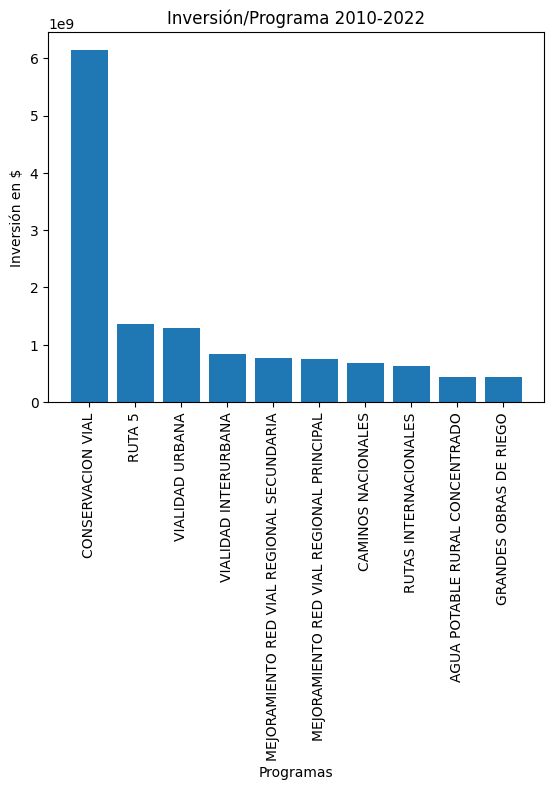

In [ ]:
#Graficando el resultado anterior de Inversión/Programa sobre una muestra de 10 de mayor a menor
#Llevando las series de interes a listas
listValorPorPrograma = df_programasInversion.head(10)["sum"].values.tolist()
listPrograma = df_programasInversion.head(10).index.tolist()
#Graficando...
plt.bar(listPrograma, listValorPorPrograma)
#Título del gráfico
plt.title("Inversión/Programa 2010-2022") # establecer título
#Configuración Y
plt.ylabel('Inversión en $') #Etiqueta Y
#Configuración X
plt.xlabel('Programas') #Etiqueta X
plt.xticks(listPrograma, rotation=90) # Establecer etiquetas del eje x
#Mostrar gráfico
plt.show()

Analizando con mayor detalles los programas que esten relacionados a vialidad...

<Axes: >

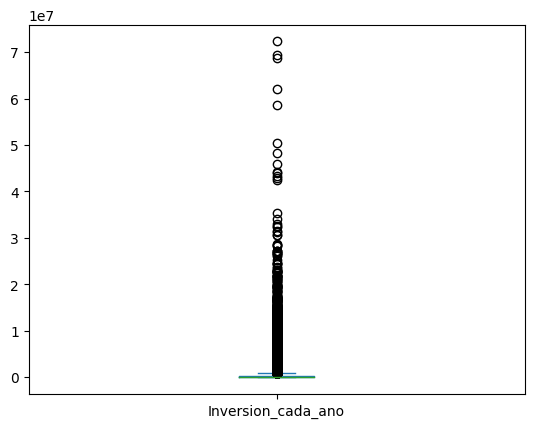

In [ ]:
#Renombrando la columna "INVERSIÓN (MILES DE $ DE CADA AÑO)" para poder realizar un gráfico de caja
df2 = df.rename(columns={'INVERSIÓN (MILES DE $ DE CADA AÑO)':'Inversion_cada_ano'})
df2.Inversion_cada_ano.plot.box()

In [ ]:
#Poniendo principal enfásis en los programas de vialidad ya que aparecen con fuerza en el top 5 de programas
df_programasVial = df_programasInversion[df_programasInversion.index.str.contains('VIAL', case=False)]
df_programasVial

,sum
PROGRAMA,
CONSERVACION VIAL,6.142405e+09
VIALIDAD URBANA,1.292774e+09
VIALIDAD INTERURBANA,8.408059e+08
MEJORAMIENTO RED VIAL REGIONAL SECUNDARIA,7.610862e+08
MEJORAMIENTO RED VIAL REGIONAL PRINCIPAL,7.607137e+08
CONSERVACION DE RIBERAS (DEFENSAS FLUVIALES),2.805495e+08
DESARROLLO VIAL AREAS COSTERAS,2.214835e+08
"SEGURIDAD VIAL, CICLOVIAS Y PASARELAS",1.286661e+08
INFRAESTRUCTURA VIAL INTERURBANA,4.423263e+07


In [ ]:
#El % de Inversión en vialidad en el periodo 2010 a 2022 seria...
num_PorcentajeVialidad = round((df_programasVial.agg(['sum'])/df_regionesInversion.agg(['sum'])*100).loc["sum"][0])
print("El % de inversión en validad en el periodo 2010 a 2022 seria: " + str(num_PorcentajeVialidad) + " %")

El % de inversión en validad en el periodo 2010 a 2022 seria: 50 %


Calculando el porcentaje de inversión pública del MOP en programas de Vialidad, concluimos que se han destinando en los últimos 12 años casi un 50% de los recursos total destinados

**3. ¿Periodos de mayor y menor inversión?**



Evaluemos como ha sido la inversión pública en distinto periodos presidenciales en Chile, si nos encontramos evaluando el periodo 2010 y 2022, tendriamos un total de 3 periodos presidenciales según: https://www.bcn.cl/historiapolitica/presidentes_de_la_republica/index.html, estos son:
*   Sebastian Piñera - SP1 - 2010-2014
*   Michelle Bachelet - MB2 - 2014-2018
*   Sebastian Piñera - SP1 - 2018-2022

In [ ]:
#Primero agrupando el presupuesto/año
df_periodosPreInversion = df.groupby('AÑO').agg(['sum'])['INVERSIÓN (MILES DE $ DE CADA AÑO)'].sort_values(by='AÑO', ascending=False)
df_periodosPreInversion

,sum
AÑO,
2022,2.607491e+09
2021,2.331707e+09
2020,1.674990e+09
2019,1.716056e+09
2018,1.459024e+09
2017,1.559299e+09
2016,1.540525e+09
2015,1.584100e+09
2014,1.404713e+09


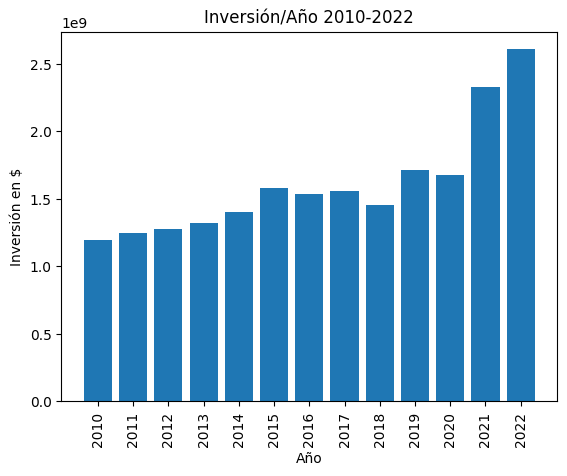

In [ ]:
#Graficando el resultado anterior de Inversión/Año sobre una muestra de 10 de mayor a menor
#Llevando las series de interes a listas
listValorPorAno = df_periodosPreInversion["sum"].values.tolist()
listAno = df_periodosPreInversion.index.tolist()
#Graficando...
plt.bar(listAno, listValorPorAno)
#Título del gráfico
plt.title("Inversión/Año 2010-2022") # establecer título
#Configuración Y
plt.ylabel('Inversión en $') #Etiqueta Y
#Configuración X
plt.xlabel('Año') #Etiqueta X
plt.xticks(listAno, rotation=90) # Establecer etiquetas del eje x
#Mostrar gráfico
plt.show()

Se evidencia un incremento progresivo año a año de la inversión del MOP, particularmente en los años 2021 y 2022, habría que estudiar más a fondo cruzando otro tipos de estudios para analizar el impacto y consecuencias de estos aumentos, algunos ánalisis adicionales que se podrían llevar acabo serían.. ¿Cual ha sido el impacto de la Pandemia en la inversión y ejecución de estos programas?¿Cual ha sido el impacto del estallido social en la inversión y ejecución de programas?, por mencionar algunas interrogantes...

Continuemos con la descripción objetivo...

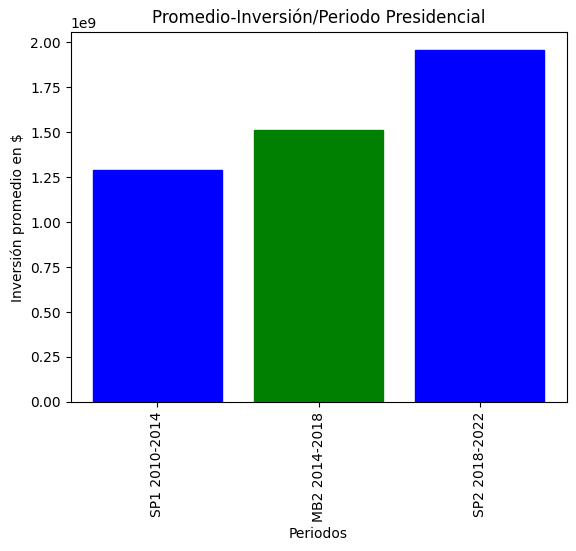

In [ ]:
#Separando por periodo presidencial
#SP1
df_periodosPreInversion_SP1 = df_periodosPreInversion.loc[2014:2010]
#MB2
df_periodosPreInversion_MB2 = df_periodosPreInversion.loc[2018:2014]
#SP2
df_periodosPreInversion_SP2 = df_periodosPreInversion.loc[2022:2018]
#Promediando por grupo
Num_Invprom_SP1 = df_periodosPreInversion_SP1.agg(['mean']).loc["mean"][0]
Num_Invprom_MB2 = df_periodosPreInversion_MB2.agg(['mean']).loc["mean"][0]
Num_Invprom_SP2 = df_periodosPreInversion_SP2.agg(['mean']).loc["mean"][0]
#Graficando el resultado Promedio-Inversión/Periodo Presidencial
list_PromInversPeriodValores = [Num_Invprom_SP1, Num_Invprom_MB2, Num_Invprom_SP2]
list_PromInversPeriodEtiquetas = ["SP1 2010-2014", "MB2 2014-2018", "SP2 2018-2022"]
#Graficando...
bars = plt.bar(list_PromInversPeriodEtiquetas, list_PromInversPeriodValores)
#Título del gráfico
plt.title("Promedio-Inversión/Periodo Presidencial") # establecer título
#Configuración Y
plt.ylabel('Inversión promedio en $') #Etiqueta Y
#Configuración X
plt.xlabel('Periodos') #Etiqueta X
plt.xticks(list_PromInversPeriodEtiquetas, rotation=90) # Establecer etiquetas del eje x
bars[0].set_color('blue')
bars[1].set_color('green')
bars[2].set_color('blue')
#Mostrar gráfico
plt.show()

Concluyendo, se ha mantenido un incremento sostenido que en primera instancia sería positivo, sin embargo, podrían haber factores economicos que influyan en la aceleración, si comparamos los peridos SP1 y MB2 con respecto a los periodos MB2 y SP2, existe una mayor pendiente asociada entre los periodos, esta pendiente es mas evidente en el gráfico Inversión/Año donde los últimos dos periodos de SP2 cuentan con un incremento importante respecto a los periodos y años anteriores entre si.

**4. ¿Cual es la distribución de inversión por Comunas?**

In [ ]:
#Agrupando por Comuna
df_provinciaInversion = df.groupby('COMUNA').agg(['sum'])['INVERSIÓN (MILES DE $ DE CADA AÑO)'].sort_values(by='sum', ascending=False)
df_provinciaInversion.head(20)

,sum
COMUNA,
INTERCOMUNAL,7.882595e+09
SANTIAGO,5.978310e+08
ARICA,3.585684e+08
ANCUD,2.149471e+08
ANTOFAGASTA,1.933155e+08
CHIMBARONGO,1.743692e+08
VALDIVIA,1.721539e+08
PUDAHUEL,1.638271e+08
CISNES,1.540547e+08


In [ ]:
#El % de Inversión de la categoria "Intercomunal" seria...
num_PorcentajeInterComuna= round((df_provinciaInversion.max()/df_provinciaInversion.agg(['sum'])*100).loc["sum"][0])
print("El % de Inversión de la categoria Intercomunal: " + str(num_PorcentajeInterComuna) + "% ")
#El % de Inversión del resto de las comunas seria...
num_PorcentajeTodasDemasComuna = round(((df_provinciaInversion.agg(['sum'])-df_provinciaInversion.max())/df_provinciaInversion.agg(['sum'])*100).loc["sum"][0])
print("El % de Inversión total por las comunas: " + str(num_PorcentajeTodasDemasComuna) + "% ")

El % de Inversión de la categoria Intercomunal: 38% 
El % de Inversión total por las comunas: 62% 


Podemos apreciar predominantemente un valor de inversión destinado a la categoria "INTERCOMUNAL" no habiendo asi una comuna que domine la inversión pública de obras, esto no choca ni afecta los ánalisis anteriores realizados por región. El % Intercomunal corresponde a un 38%

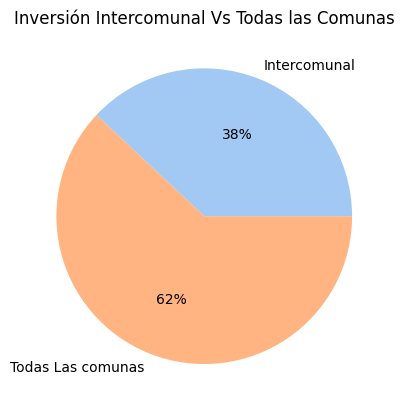

In [ ]:
#Graficar Torta de %Intercomunal/Todo el resto de comunas
listValores = [num_PorcentajeInterComuna, num_PorcentajeTodasDemasComuna]
listEtiquetas = ["Intercomunal", "Todas Las comunas"]
#Graficando...
#Data
data = listValores
#Etiquetas
labels = listEtiquetas
#Configuraciones varias
colors = sns.color_palette('pastel')
plt.pie(data, labels=labels, colors = colors, autopct = '%0.0f%%')
#Título del gráfico
plt.title('Inversión Intercomunal Vs Todas las Comunas')
#Mostrar gráfico
plt.show()

Las conclusiones finales en lo que respecta a como ha sido la administración historica de recursos del MOP en los últimos años basadas en las 4 interrogantes iniciales, son:
1. Las regiones con mayor inversión en el periodo 2010-2022 son La Región Metropolitana y la región de los Lagos. Las regiones de tarapacá y Ñuble son las que tienen menor inversión. Por otra parte, La región metropolitana concentra el 11% del presupuesto total invertido en los últimos 12 años, mientras que la región de Ñuble un poco más de 1%.

2. En lo que respecta a los programas con mayor inversión de parte del MOP, identificamos algo interesante pero que no sorprende, el top 5 de programas con mayor inversión están asociados a proyectos de Vialidad, lo cual hace sentido debido a la relevancia de este tipo de proyectos para el funcionamiento de distintos sectores comerciales, transporte, turisticos, etc. Calculando el porcentaje de inversión pública del MOP en programas de Vialidad, concluimos que se han destinando en los últimos 12 años casi un 50% de los recursos total destinados.

3. Se ha mantenido un incremento de inversión pública sostenida que en primera instancia sería positivo, sin embargo, podrían haber factores economicos que influyan en la aceleración, si comparamos los peridos SP1 y MB2 con respecto a los periodos MB2 y SP2, existe una mayor pendiente asociada entre los periodos, esta pendiente es mas evidente en el gráfico Inversión/Año donde los últimos dos periodos de SP2 cuentan con un incremento importante respecto a los periodos y años anteriores entre si.

4. Se puede apreciar predominantemente un valor de inversión destinado a la categoria "INTERCOMUNAL" no habiendo asi una comuna que domine la inversión pública de obras, esto no choca ni afecta los ánalisis anteriores realizados por región. El % Intercomunal corresponde a un 38%.